In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DataPreprocessing
from functools import reduce

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
def graph_data(me_filename, mom_filename):    
    me = np.load(me_filename, allow_pickle=True)[20000:] #Matrix elements
    print('hi')
    mom = np.load(mom_filename, allow_pickle=True, encoding='bytes')[20000:] #4-momenta of inputs
    print('ho')
    
    ##Multiply matrix element
    mandel_multiply = reduce(np.multiply, DataPreprocessing.mandel_creation(['2,3,4','2,3,4'], mom))
    ##Gradient
    
    print('hi')
    #print(mandel_multiply.shape)
    #print(me.shape)
    me = np.multiply(me, mandel_multiply)
    
    
    print('ho')
    mandel = np.transpose(DataPreprocessing.mandel_creation(['2,3'], mom)[0])
    mandel.shape= (len(mandel),1)
    linreg = LinearRegression().fit(np.log10(mandel), np.log10(me))

    print('Gradient : {}'.format(linreg.coef_[0]))
    print('Intercept : {}'.format(linreg.intercept_))
    
    return (me, DataPreprocessing.mandel_creation(['2,3,4'], mom)[0], linreg)

hi
ho
hi
ho
Gradient : 0.00015871829612039765
Intercept : -0.3322490891304158


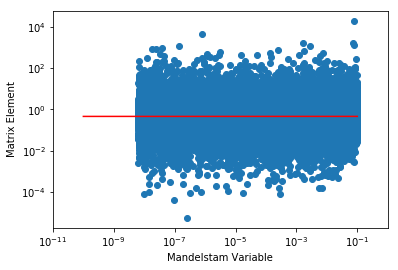

In [3]:
me, S, linreg = graph_data('LO/MG_uuxgg_smalls/me_100000.npy', 'LO/MG_uuxgg_smalls/mom_100000.npy')

plt.xlim(10**-(11), 1)
plt.yscale('log')
plt.xscale('log')

plt.ylabel('Matrix Element')
plt.xlabel('Mandelstam Variable')
plt.scatter(S, me)

plt.plot(np.logspace(-10, -1,100),10**linreg.predict(np.array([np.linspace(-10, -1,100)]).T),color='r')

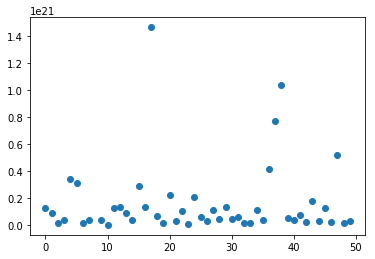

In [4]:
me = np.load('LO/MG_uuxgg_smalls/me_100000.npy', allow_pickle=True) #Matrix elements
mom_raw = np.load('LO/MG_uuxgg_smalls/mom_100000.npy', allow_pickle=True, encoding='bytes') #4-momenta of inputs
mom = np.array([np.array(element) for element in mom_raw])

##Gradient
mandel = DataPreprocessing.mandel_creation(['2,3'], mom).T


plt.scatter(range(0,50),me[:50])
#plt.yscale('log')

[[[ 5.00000000e+02  4.20735492e+02  0.00000000e+00  2.70151153e+02]
  [ 3.31815195e+02 -2.79212859e+02  2.38910878e-04 -1.79280515e+02]
  [ 7.38475399e+01 -6.21405619e+01  9.63137057e-05 -3.98999959e+01]
  [ 9.43372653e+01 -7.93820711e+01 -3.35224584e-04 -5.09706417e+01]]

 [[ 4.99999999e+02  4.20735492e+02  0.00000000e+00  2.70151153e+02]
  [ 4.31068583e+02 -3.62731705e+02  1.19552949e-04 -2.32907350e+02]
  [ 6.32451848e+01 -5.32189875e+01 -6.18809150e-05 -3.41715189e+01]
  [ 5.68623234e+00 -4.78479917e+00 -5.76720340e-05 -3.07228422e+00]]

 [[ 4.99999999e+02  4.20735492e+02  0.00000000e+00  2.70151153e+02]
  [ 6.89768779e+01 -5.80420407e+01  3.28135519e-04 -3.72683658e+01]
  [ 2.26633362e+02 -1.90705399e+02 -1.29515986e-04 -1.22450528e+02]
  [ 2.04389760e+02 -1.71988053e+02 -1.98619533e-04 -1.10432259e+02]]

 ...

 [[ 4.99995018e+02  4.20731301e+02  0.00000000e+00  2.70148461e+02]
  [ 2.08526202e+02 -1.75463969e+02 -4.39884392e+00 -1.12664119e+02]
  [ 7.39574542e+01 -6.22315964e+01  

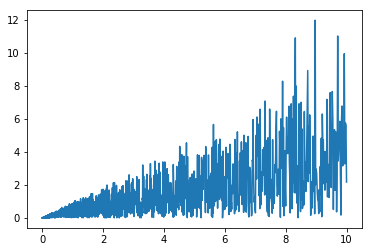

In [47]:
mom = np.load('LO/MG_uuuxux_smalls/mom_5000.npy', allow_pickle=True, encoding='bytes')
print(mom)
mandel = DataPreprocessing.mandel_creation(['2,3'], mom)

mandel.shape = 5000

x = np.logspace(-3, 1, 5000)
print(min(x))

plt.plot(x, mandel)

In [41]:

print(mandel[3000:4000])


[ 0.10014024  0.04147135  0.16143876  0.09897224  0.05715857  0.23435824
  0.21005563  0.17439617  0.10361984  0.08959425  0.02386768  0.19341786
  0.20281508  0.0656879   0.14402788  0.13669446  0.00799672  0.10824476
  0.06198056  0.14802796  0.09017266  0.14896314  0.08261737  0.02503789
  0.08063067  0.0313569   0.1136696   0.16528457  0.04811022  0.228625
  0.17130195  0.11636675  0.08811418  0.23296608  0.06278114  0.06399812
  0.19616708  0.06428742  0.09877504  0.06021834  0.11084764  0.09022889
  0.08041997  0.12113867  0.03023969  0.07151916  0.21695962  0.12562081
  0.10810354  0.1319581   0.08408642  0.13127278  0.072027    0.06791715
  0.16818126  0.16348321  0.09368108  0.07097691  0.08355758  0.11079153
  0.08007609  0.10210973  0.03714892  0.13104209  0.14022656  0.08881009
  0.15818296  0.04304025  0.15047348  0.12156363  0.08520467  0.22942331
  0.11360238  0.16010952  0.04928602  0.08126617  0.16878816  0.04741908
  0.13738719  0.09460644  0.04715019  0.13272282  0.1

In [ ]:
print(np.logspace(-3, 1, 5000))

In [43]:
print(np.argmin(mandel))

4940


In [44]:
print(mom[4940])

[[ 4.99995515e+02  4.20731718e+02  0.00000000e+00  2.70148730e+02]
 [ 1.52175137e+02 -1.28046460e+02  3.60954373e+00 -8.22176866e+01]
 [ 5.69959188e+01 -4.79597339e+01  2.04381333e-01 -3.07945910e+01]
 [ 2.90833430e+02 -2.44725524e+02 -3.81392507e+00 -1.57136452e+02]]


In [45]:
print(mandel[4940])

-11.970905495189072
